# Spark DataFrame - Basics

Let's start off with the fundamentals of Spark DataFrame. 

Objective: In this exercise, you'll find out how to start a spark session, read in data, explore the data and manipuluate the data (using DataFrame syntax as well as SQL syntax). Let's get started! 

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/03 04:22:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Let's read in the data. Note that it's in the format of JSON.
df = spark.read.csv('heart_data.csv',header=True, inferSchema=True)

## Data Exploration

In [5]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

+-----+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+
|index| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|
+-----+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+
|    0|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|
|    1|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|
|    2|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|
|    3|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|
|    4|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|
|    5|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|
|    6|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|
|    7| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|
|    8| 13|17668|     1|   158|  71.0|  110|   70|    

['index',
 'id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [7]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
df.describe().toPandas()


,summary,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,count,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
1,mean,34999.5,49972.4199,19468.865814285713,1.3495714285714286,164.35922857142856,74.20569,128.8172857142857,96.63041428571428,1.3668714285714285,1.226457142857143,0.08812857142857143,0.053771428571428574,0.8037285714285715
2,stddev,20207.403758688713,28851.302323172742,2467.251667241397,0.47683801558286265,8.210126364538075,14.395756678511347,154.0114194560919,188.47253029638918,0.6802503486993823,0.5722702766138456,0.28348381676993667,0.22556770360410555,0.3971790635049267
3,min,0,0,10798,1,55,10.0,-150,-70,1,1,0,0,0
4,max,69999,99999,23713,2,250,200.0,16020,11000,3,3,1,1,1


In [5]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



## Data Manipulation

In [8]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



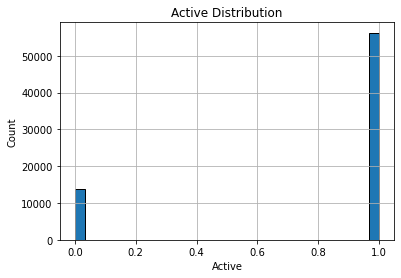

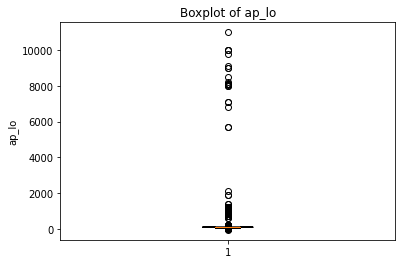

In [18]:
# We can also select various columns from a DataFrame. 
pandas_df = df.select('Active').toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(pandas_df['Active'], bins=30, edgecolor='black')
plt.title('Active Distribution')
plt.xlabel('Active')
plt.ylabel('Count')
plt.grid(True)
plt.show()

pandas_df = df.select('ap_lo').toPandas()
ap_hi_data = df.select('ap_lo').toPandas()
plt.figure(figsize=(6,4))
plt.boxplot(ap_hi_data['ap_lo'], vert=True, notch=True)
plt.title('Boxplot of ap_lo')
plt.ylabel('ap_lo')
plt.show()


In [8]:
from pyspark.sql import functions as F

# Filter based on the conditions provided
valid_blood_pressure = (df['ap_hi'] >= 90) & (df['ap_hi'] <= 220) & \
                       (df['ap_lo'] >= 40) & (df['ap_lo'] <= 140)

# Apply the filter to the DataFrame
filtered_df = df.filter(valid_blood_pressure)
filtered_df.describe().toPandas()



,summary,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,count,68609,68609,68609,68609,68609,68609,68609,68609,68609,68609,68609,68609,68609
1,mean,34998.23020303459,49970.61369499628,19465.420105234007,1.3487734845282688,164.364937544637,74.1323805914676,126.69103178883236,81.33725896019473,1.3647043390808786,1.225815855062747,0.08793307000539288,0.05341864769928144,0.8034660175778688
2,stddev,20201.646287580574,28843.05782403767,2467.5501796900703,0.47658561830277735,8.18266945287181,14.326953523984836,16.583793906163795,9.428657983669689,0.6790565299910482,0.5717833014820166,0.2831996013009668,0.2248684788756169,0.3973797651848832
3,min,0,0,10798,1,55,11.0,90,40,1,1,0,0,0
4,max,69999,99999,23713,2,250,200.0,220,140,3,3,1,1,1


## Introducing SQL
We can query a DataFrame as if it were a table! Let's see a few examples of that below:

In [10]:
valid_weight = ((filtered_df['weight'] >= 30) & (filtered_df['weight'] <= 120))
# Apply the filter to the DataFrame
filtered_df = filtered_df.filter(valid_weight)
filtered_df.describe().toPandas()

,summary,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,count,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135
1,mean,34994.78720187862,49965.72089234608,19467.39646290453,1.3482791516841564,164.3420268584428,73.72431789829017,126.59266162765098,81.28676891465473,1.3628091289352022,1.2238790636236883,0.0875174286343289,0.05307110882806194,0.8036104791957144
2,stddev,20199.226628022392,28839.61860344482,2467.103921121898,0.47642849996010683,8.128609109514718,13.421770777003237,16.51400442981671,9.398164874664051,0.6777320457346168,0.5697709440056147,0.28259387890421145,0.22417694756616977,0.39726942148915695
3,min,0,0,10798,1,55,30.0,90,40,1,1,0,0,0
4,max,69999,99999,23713,2,250,120.0,220,140,3,3,1,1,1


In [19]:
valid_height = ((filtered_df['height'] >= 130) & (filtered_df['height'] <= 210))
# Apply the filter to the DataFrame
filtered_df = filtered_df.filter(valid_height)
filtered_df.describe().toPandas()
filtered_df.write.csv('filtered_data.csv', header=True)

Now that we're done with this tutorial, let's move on to Spark DataFrame Operations!